<a href="https://colab.research.google.com/github/hurricane195/Intro-to-Machine-Learning/blob/Homework-4/Homework_4_Problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 2:**

**Develop a SVR regression model that predicts housing price based on the following input variables:**

**Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea**

**1-Plot your regression model for SVR similar to the sample code provided on Canvas.**

**2-Compare your results against linear regression with regularization loss that you already did in homework1.**

**3-Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K). Identify the optimum number of K, principal components that achieve the highest regression accuracy.**

**4-Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels.**

**MODIFIED EXAMPLES**

In [ ]:
#using a modified version of Dr. Tabkhi's "LinearRegression" code found at: https://github.com/HamedTabkhi/Intro-to-ML/blob/main/IntroCodes/LinearRegression.ipynb
#using a modified version of Dr. Tabkhi's "Pre_Processing" code found at: https://github.com/HamedTabkhi/Intro-to-ML/blob/main/RegressionCode/Pre_Processing.ipynb
#using a modified version of Dr. Tabkhi's "DummyRegressionValidation" code found at: https://github.com/HamedTabkhi/Intro-to-ML/blob/main/RegressionCode/DummyRegressionValidation.ipynb
#using a modified version of Dr. Tabkhi's "LogisticRegression" code found at: https://github.com/HamedTabkhi/Intro-to-ML/blob/main/Classifier/LogisticRegression.ipynb
#using a modified version of Dr. Tabkhi's "LogisticRegression2" code found at: https://github.com/HamedTabkhi/Intro-to-ML/blob/main/Classifier/LogisticRegression2.ipynb
#using a modified version of Dr. Tabkhi's "PCAExample" code found at: https://github.com/HamedTabkhi/Intro-to-ML/blob/main/Classifier/%20PCAExample.ipynb
#using a modified version of Dr. Tabkhi's "Naive_Bayesian" code found at: https://github.com/HamedTabkhi/Intro-to-ML/blob/main/Classifier/Naive_Bayesian.ipynb
#using a modified version of Dr. Tabkhi's "SVM" code found at: https://github.com/HamedTabkhi/Intro-to-ML/blob/main/SVM/SVM.ipynb
#using a modified version of Dr. Tabkhi's "SVR" code found at: https://github.com/HamedTabkhi/Intro-to-ML/blob/main/SVM/SVR.ipynb

#using a modified version of TA Fatema Jannat's "Homework 3 Solutions" code found at: https://uncc.instructure.com/courses/205463/files/folder/Uploaded%20Media

#using a modified version of SKLEARN "Linear Regression Example" for 'R2' and 'Mean Square Error': https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

#usine examples from The Data Science Library 'Support Vector Regression (SVR) using linear and non-linear kernels': http://sigmaquality.pl/uncategorized/support-vector-regression-svr-using-linear-and-non-linear-kernels-en240120201439/

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVR
from sklearn.decomposition import PCA

#NEW
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_squared_log_error

# Housing Dataset

In [ ]:
url = 'https://raw.githubusercontent.com/hurricane195/Intro-to-Machine-Learning/Datasets/Housing.csv'
housing = pd.DataFrame(pd.read_csv(url))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# List of variables to map

varlist = ['mainroad','guestroom','basement','hotwaterheating','airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

housing[varlist] = housing[varlist].apply(binary_map)

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
#area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad','guestroom','basement', 'hotwaterheating', 'airconditioning','parking', 'prefarea']

housingNew=housing[num_vars]
housingNew.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [ ]:
# Separate features and labels

varlist_X = ['area', 'bedrooms', 'bathrooms', 'stories','mainroad','guestroom','basement', 'hotwaterheating','airconditioning','parking','prefarea']
varlist_Y = ['price']

**DR. Tahbkei's "SVR" Code Example**

K = 1
K = 2
K = 3
K = 4
K = 5
K = 6
K = 7
K = 8
K = 9
K = 10
K = 11


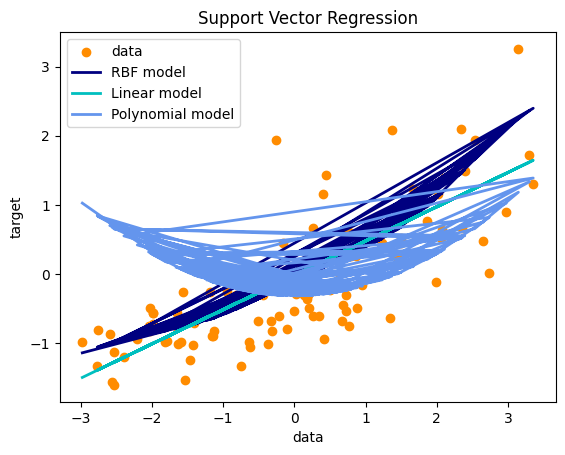

In [ ]:
X = housingNew[varlist_X]
Y = housingNew[varlist_Y]

#Standardize
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
sc_Y = StandardScaler()
Y = sc_Y.fit_transform(Y)

#Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# Kernalization - Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)

n=X.shape[1]
for i in range(n):
      print("K = "+ str(i+1))
      pca = PCA(n_components=i+1)
      principalComponents = pca.fit_transform(X)
      X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.20, random_state=9999)

      LIN_classifier = svr_lin
      POLY_classifier = svr_poly
      RBF_classifier = svr_rbf

      LIN_classifier.fit(X_train, y_train)
      POLY_classifier.fit(X_train, y_train)
      RBF_classifier.fit(X_train, y_train)

      LIN_Y_pred = LIN_classifier.predict(X_test)
      POLY_Y_pred = POLY_classifier.predict(X_test)
      RBF_Y_pred = RBF_classifier.predict(X_test)

y_lin = svr_lin.fit(X_train[:,0:1], y_train).predict(X_test[:,0:1])
y_poly = svr_poly.fit(X_train[:,0:1], y_train).predict(X_test[:,0:1])
y_rbf = svr_rbf.fit(X_train[:,0:1], y_train).predict(X_test[:,0:1])

# Look at the results
lw = 2
plt.scatter(X_test[:,0:1], y_test, color='darkorange', label='data')
plt.plot(X_test[:,0:1], y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X_test[:,0:1], y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X_test[:,0:1], y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

**Various Code from Sklearn**

In [ ]:
X = housingNew[varlist_X]
Y = housingNew[varlist_Y]

In [ ]:
#X

In [ ]:
#Y

In [ ]:
#print('X Shape = ', X.shape)
#print('Y Shape = ', Y.shape)

In [ ]:
#Standardize
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
sc_Y = StandardScaler()
Y = sc_Y.fit_transform(Y)

#Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=.2, random_state = 0)

In [ ]:
#X

In [ ]:
#Y

**Kernalization**

In [ ]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
y_rbf = svr_rbf.fit(X_train, Y_train).predict(X_test)

svr_lin = SVR(kernel='linear', C=1e3)
y_lin = svr_lin.fit(X_train, Y_train).predict(X_test)

svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_poly = svr_poly.fit(X_train, Y_train).predict(X_test)

**R2 Metrics**

In [ ]:
print('RBF Test R^2     : %.3f'%r2_score(Y_test, y_rbf))
print('RBF Test R^2     : %.3f'%svr_rbf.score(X_test, Y_test))
print('RBF Training R^2 : %.3f'%svr_rbf.score(X_train, Y_train))
RBF_R2 = svr_rbf.score(X_train,Y_train)

print('Poly Test R^2     : %.3f'%r2_score(Y_test, y_poly))
print('Poly Test R^2     : %.3f'%svr_poly.score(X_test, Y_test))
print('Poly Training R^2 : %.3f'%svr_poly.score(X_train, Y_train))
POLY_R2 = svr_poly.score(X_train,Y_train)

print('Lin Test R^2     : %.3f'%r2_score(Y_test, y_lin))
print('Lin Test R^2     : %.3f'%svr_lin.score(X_test, Y_test))
print('Lin Training R^2 : %.3f'%svr_lin.score(X_train, Y_train))
LIN_R2 = svr_lin.score(X_train,Y_train)


RBF Test R^2     : -0.233
RBF Test R^2     : -0.233
RBF Training R^2 : 0.964
Poly Test R^2     : 0.103
Poly Test R^2     : 0.103
Poly Training R^2 : 0.634
Lin Test R^2     : 0.671
Lin Test R^2     : 0.671
Lin Training R^2 : 0.663


**MSE Metrics**

In [ ]:
print('RBF Test MSE  : %.3f'%mean_squared_error(Y_test, y_rbf))
print('FBF Train MSE : %.3f'%mean_squared_error(Y_train, svr_rbf.predict(X_train)))

print('Poly Test MSE  : %.3f'%mean_squared_error(Y_test, y_poly))
print('Poly Train MSE : %.3f'%mean_squared_error(Y_train, svr_poly.predict(X_train)))

print('Lin Test MSE  : %.3f'%mean_squared_error(Y_test, y_lin))
print('Lin Train MSE : %.3f'%mean_squared_error(Y_train, svr_lin.predict(X_train)))

RBF Test MSE  : 1.018
FBF Train MSE : 0.038
Poly Test MSE  : 0.740
Poly Train MSE : 0.382
Lin Test MSE  : 0.271
Lin Train MSE : 0.352


In [ ]:


varlist_X = ['area', 'bedrooms', 'bathrooms', 'stories','mainroad','guestroom','basement', 'hotwaterheating','airconditioning','parking','prefarea']
varlist_Y = ['price']

X = housingNew[varlist_X]
Y = housingNew[varlist_Y]

X  = StandardScaler().fit_transform(X)
Y = StandardScaler().fit_transform(Y)
Y = Y.flatten()
Y_Series = pd.Series(Y)

In [ ]:
#X

**Graph Variables**

In [ ]:
RBFTrain = []
RBFPred = []
RBFTest = []

PolyTrain = []
PolyPred = []
PolyTest = []

LinTrain = []
LinPred = []
LinTest = []

**PCA**

In [ ]:
for k in range(1, 12):
      pca = PCA(n_components = k)
      principalComponents = pca.fit_transform(X)
      newHousing = pd.DataFrame(data = principalComponents, columns = [*range(1,k+1)])
      finalHousing = pd.concat([newHousing, Y_Series], axis = 1)
      output = finalHousing.pop(1)

      newX = finalHousing.values
      newY = output.values
      X_train, X_test, Y_train, Y_test = train_test_split(newX, newY, train_size=0.8, test_size = 0.2, random_state = 0)

      Linclassifier = svr_lin
      Linclassifier.fit(X_train, Y_train)
      LIN_Y_pred = Linclassifier.predict(X_test)

      # Accuracy Varialbles for Linear SVR
      NewLin= Linclassifier.score(X_train, Y_train)
      FirstLinPred = r2_score(Y_test, LIN_Y_pred)
      FirstLinTest = Linclassifier.score(X_test, Y_test)
      # Save to Linear SVR List
      LinTest.append(FirstLinTest)
      LinTrain.append(NewLin)
      LinPred.append(FirstLinPred)

      # Averaging Linear SVM Values
      if  LIN_R2 < NewLin:
          LIN_R2 = NewLin
          index = k

      Polyclassifier = svr_poly
      Polyclassifier.fit(X_train, Y_train)
      Poly_Y_pred = Polyclassifier.predict(X_test)

      # Accuracy Varialbles for Polynomial SVR
      NewPoly= Polyclassifier.score(X_train, Y_train)
      FirstPolyPred = r2_score(Y_test, Poly_Y_pred)
      FirstPolyTest = Linclassifier.score(X_test, Y_test)
      # Save to Polynomial SVR List
      PolyTest.append(FirstPolyTest)
      PolyTrain.append(NewPoly)
      PolyPred.append(FirstPolyPred)

      # Averaging Polynomial SVM Values
      if  POLY_R2 < NewPoly:
          POLY_R2 = NewPoly
          index = k

      RBFclassifier = svr_rbf
      RBFclassifier.fit(X_train, Y_train)
      RBF_Y_pred = RBFclassifier.predict(X_test)

      # Accuracy Varialbles for RBF SVR
      NewRBF= RBFclassifier.score(X_train, Y_train)
      FirstRBFPred = r2_score(Y_test, RBF_Y_pred)
      FirstRBFTest = RBFclassifier.score(X_test, Y_test)
      # Save to RBF SVR List
      RBFTest.append(FirstRBFTest)
      RBFTrain.append(NewRBF)
      RBFPred.append(FirstRBFPred)

      # Averaging RBF SVM Values
      if  RBF_R2 < NewRBF:
          RBF_R2 = NewRBF
          index = k

In [ ]:
#Y_train

**SVR Graph for all variables**

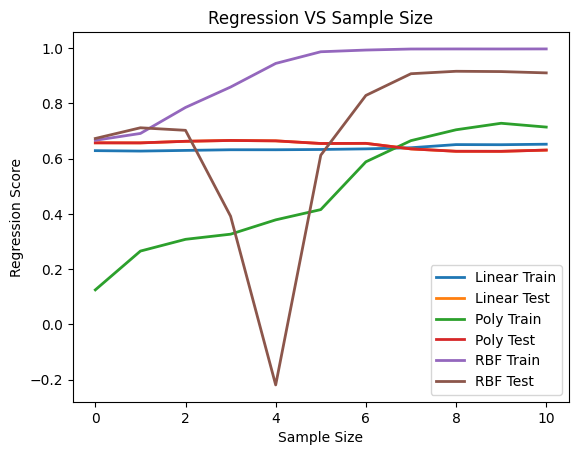

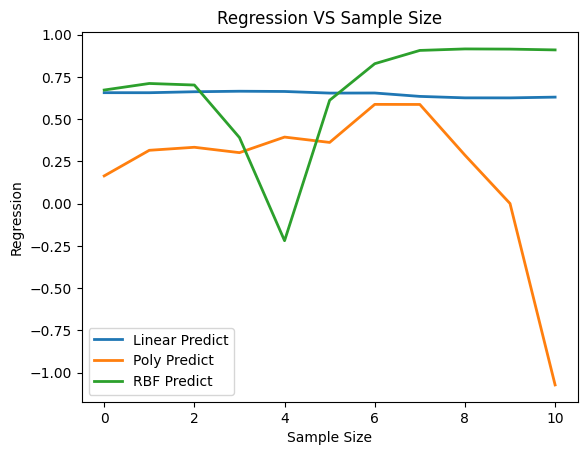

In [ ]:
lw = 2
plt.plot(LinTrain, lw = lw, label = "Linear Train")
plt.plot(LinTest, lw = lw, label = "Linear Test")

plt.plot(PolyTrain, lw = lw, label = "Poly Train")
plt.plot(PolyTest, lw = lw, label = "Poly Test")

plt.plot(RBFTrain, lw = lw, label = "RBF Train")
plt.plot(RBFTest, lw = lw, label = "RBF Test")

plt.xlabel('Sample Size')
plt.ylabel('Regression Score')
plt.title('Regression VS Sample Size')
plt.legend()
plt.show()
plt.plot(LinPred, lw=lw, label = "Linear Predict")
plt.plot(PolyPred, lw=lw, label = "Poly Predict")
plt.plot(RBFPred, lw=lw, label = "RBF Predict")
plt.xlabel('Sample Size')
plt.ylabel('Regression')
plt.title('Regression VS Sample Size')
plt.legend()